# **Installations Lego Segmentation Code (pysource.com)**

This cells automatically downloads the libraries to run this demo.
This is a customly created Mask RCNN model that is used to Identify and Segment the 4 legos used in the example.

This is possible for any object. I teach and provide the Notebook to easily create your custom model on this mini course: https://pysource.com/mask-rcnn-training-pro/

In [6]:
import warnings
warnings.filterwarnings('ignore')
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!git clone https://github.com/pysource7/calculate_object_area_exercise
import sys
sys.path.append("/content/calculate_object_area_exercise/mrcnn")
from mrcnn_colab_engine import *
!wget https://import.cdn.thinkific.com/338732/courses/854812/mask_rcnn_object_0009-220120-123759.h5
!wget -O lego_image_sample.jpg https://pysource.com/wp-content/uploads/2022/01/img1.jpg
MODEL_DIR = "/content/mask_rcnn_object_0009-220120-123759.h5"
# Load Mask rcnn model
config = InferenceConfig()
lego_model = modellib.MaskRCNN(mode="inference", model_dir="", config=config)
# Load weights generated to detect 4 lego categories
lego_model.load_weights(MODEL_DIR, by_name=True)

# Mask RCNN model + Functions
from google.colab.patches import cv2_imshow
from mrcnn_colab_engine import random_colors, draw_mask, detect_contours_maskrcnn
class_names = ["BG", "green", "blue", "light blue", "pink"]
# Generate random colors
colors = random_colors(len(class_names))

fatal: destination path 'calculate_object_area_exercise' already exists and is not an empty directory.
--2022-01-21 14:22:26--  https://import.cdn.thinkific.com/338732/courses/854812/mask_rcnn_object_0009-220120-123759.h5
Resolving import.cdn.thinkific.com (import.cdn.thinkific.com)... 151.101.2.132, 151.101.66.132, 151.101.130.132, ...
Connecting to import.cdn.thinkific.com (import.cdn.thinkific.com)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255923688 (244M) [application/octet-stream]
Saving to: ‘mask_rcnn_object_0009-220120-123759.h5.1’

mask_rcnn_object_00 100%[===================>] 244.07M  4.30MB/s    in 78s     

2022-01-21 14:23:44 (3.12 MB/s) - ‘mask_rcnn_object_0009-220120-123759.h5.1’ saved [255923688/255923688]

--2022-01-21 14:23:44--  https://pysource.com/wp-content/uploads/2022/01/img1.jpg
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.

# **Load Image and detect Legos area**

In [16]:
RATIO_PIXEL_TO_CM = 78 # 78 pixels are 1cm
RATIO_PIXEL_TO_SQUARE_CM = 78 * 78

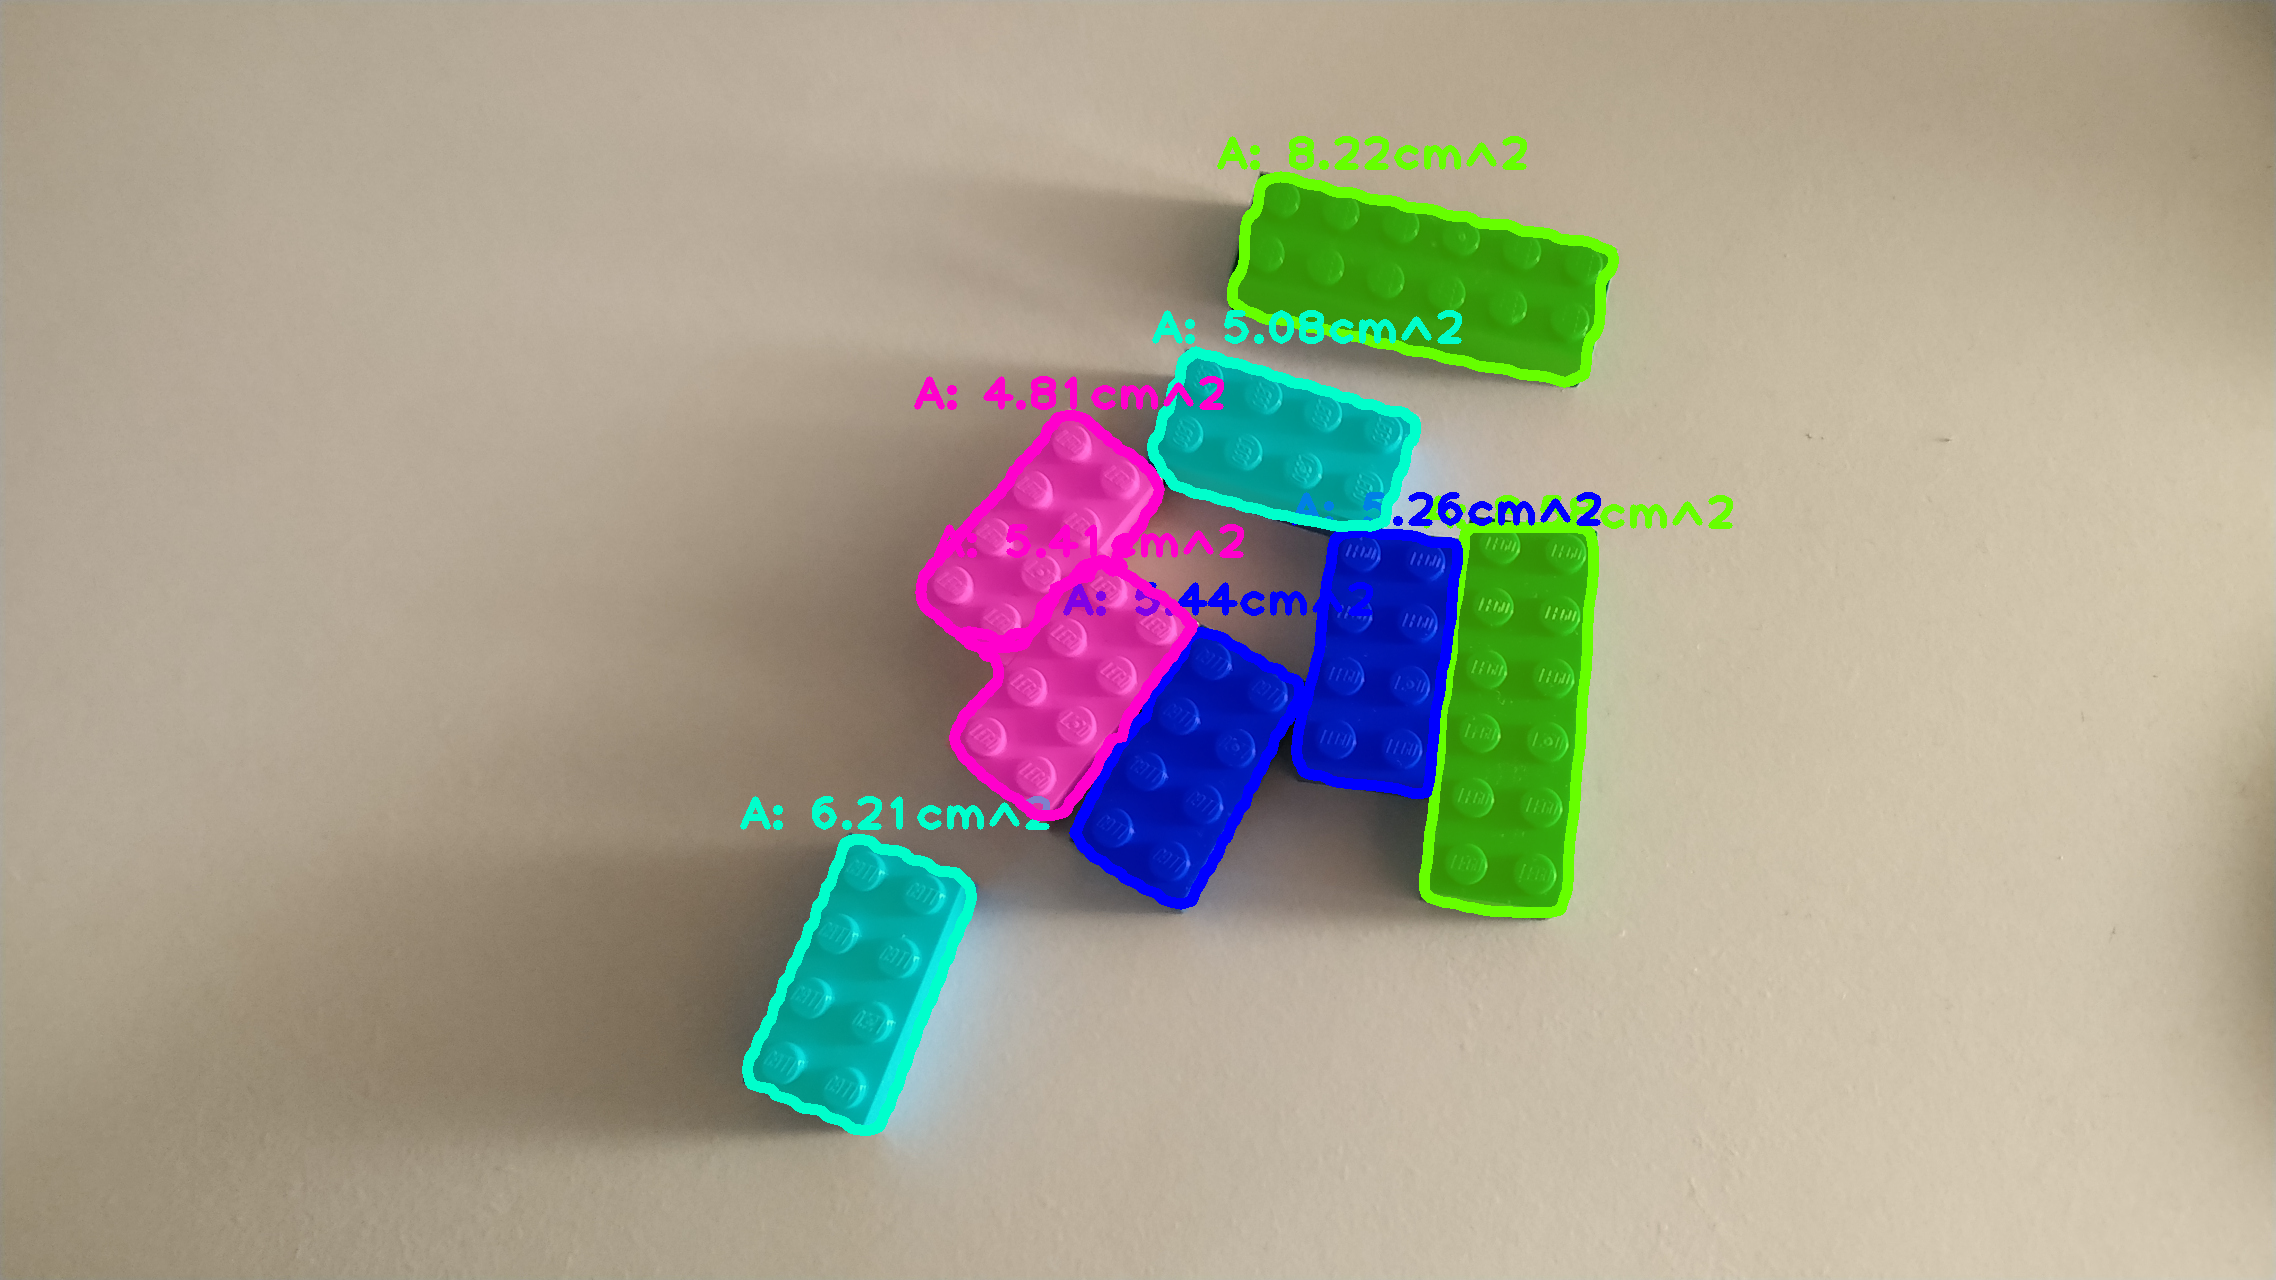

In [17]:
import cv2
from mrcnn_colab_engine import detect_contours_maskrcnn, draw_mask

img = cv2.imread("lego_image_sample.jpg")

# 1. Get objects mask with Mask RCNN
class_ids, boxes, masks = detect_contours_maskrcnn(lego_model, img)
for class_id, box, object_contours in zip(class_ids, boxes, masks):
    # Box
    y1, x1, y2, x2 = box
    # cv2.rectangle(img, (x1, y1), (x2, y2), colors[class_id], 15)
    cv2.polylines(img, [object_contours], True, colors[class_id], 10)
    img = draw_mask(img, [object_contours], colors[class_id])

    # 2. Calculate area
    area_px = cv2.contourArea(object_contours)
    area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)

    cv2.putText(img, "A: {}cm^2".format(area_cm), (x1, y1), cv2.FONT_HERSHEY_PLAIN, 3, colors[class_id], 5)


cv2_imshow(img)